# Load Libraries
In this section, we shall load the necessary libraries required to conduct this data analysis project. We shall import `pandas` for IO operations and tabular data manipulation, `numpy` for linear algebra alongside `matplotlib` and  `seaborn` for data visualization. The function of other libraries used will be stated as a comment

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

# Basic Exploration
In this section, we load the dataset and perform basic data exploration on it. This involves getting information on the dataset - it's types, features, presence of null values etc.

In [2]:
## load dataset
data = pd.read_csv('../input/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
## let's get basic information about this dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


From the information above, we can see that we have there are a thousand data points. Looking at the count of each column, we'll notice that there is no null value (all count is 1000; no more, no less). Also, we'll notice that there are 5 categorical columns and 3 numerical columns. We will have differnt ways of dealing with both types of columns.

Before we move on, let's confirm the amount of null values

In [4]:
# get the percentage of null values present in data
(data.isna().sum() * 100 / data.isna().count()) \
    .map(lambda value: str(value) + '%') \
    .rename('Percentage of null values in dataset')

gender                         0.0%
race/ethnicity                 0.0%
parental level of education    0.0%
lunch                          0.0%
test preparation course        0.0%
math score                     0.0%
reading score                  0.0%
writing score                  0.0%
Name: Percentage of null values in dataset, dtype: object

The amount of null values obseerved from the `pd.DataFrame.info` method has been confirmed in the above cell. Next up, we try getting an understanding of the numerical features. This can be done with the DataFrame `describe` method, and visually using various types of plots. Both methods will be handled below

## Descriptive Statistics

In [5]:
## let's get the statistic to the numerical columns
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [20]:
## let's separate numerical and categorical columns
# [col for col in data.columns if data[col].dtype != 'object']
num_cols = data.loc[:, data.dtypes != 'object'].columns
cat_cols = data.loc[:, data.dtypes == 'object'].columns

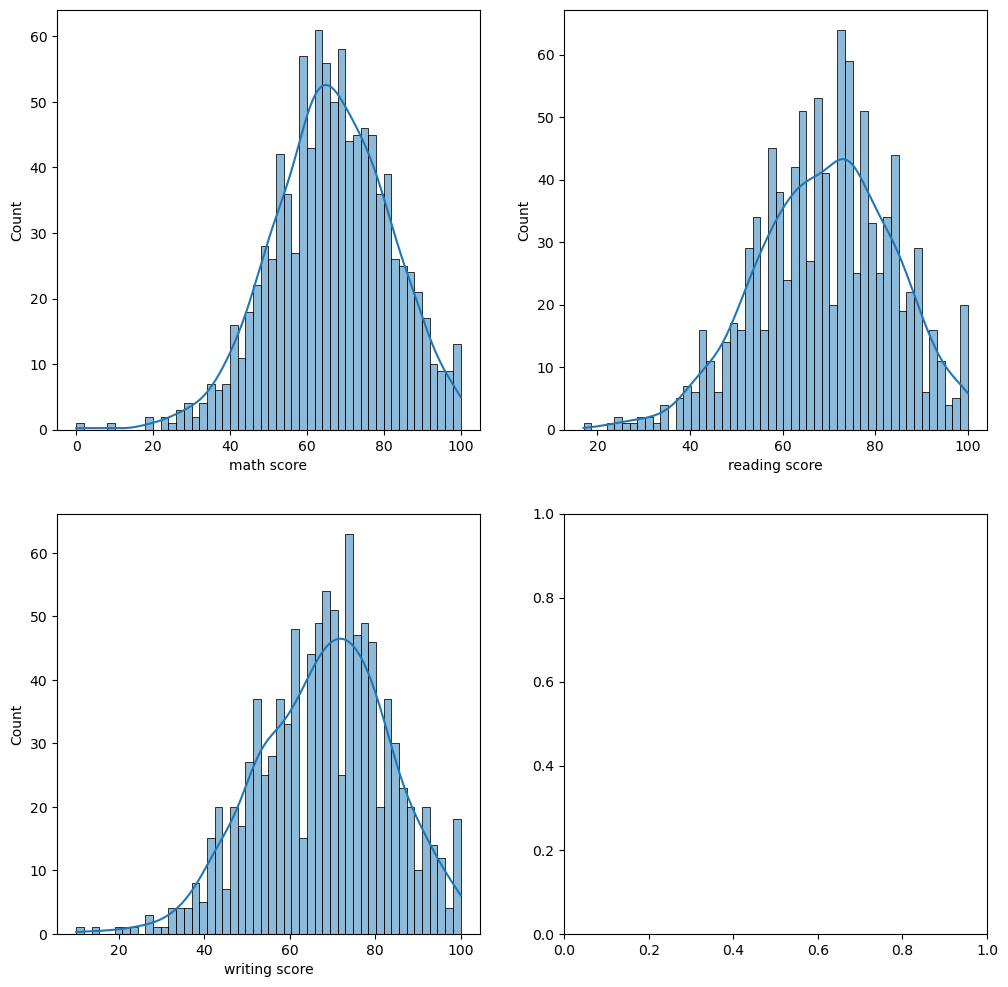

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i, col in enumerate(num_cols):
    sns.histplot(data, x=col, bins=50, kde=True, ax=ax[i//2, i%2])

Let's visualize outliers in the dataset using boxplots

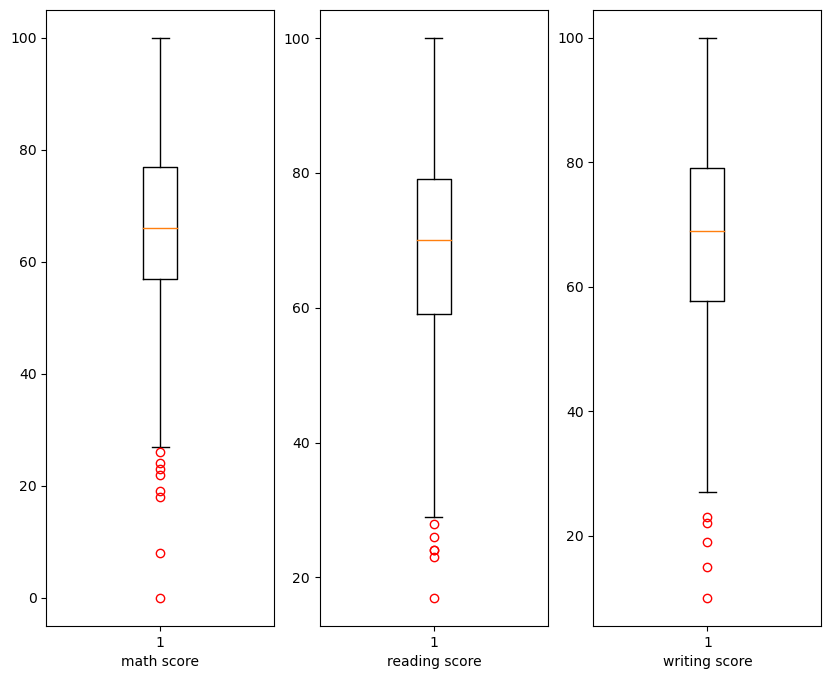

In [36]:
fig, axs = plt.subplots(1, len(num_cols), figsize=(10, 8))

for i, ax in enumerate(axs):
    ax.boxplot(data[num_cols[i]], flierprops={'markeredgecolor': 'red'})
    ax.set_xlabel(num_cols[i])

From the above boxplots, we notice that the low scores are outliers whether math, reading or writing. Let's try to observe if there is any relationship between the categorical data and the outlier <b>low scores</b>

In [64]:
Q1 = data.quantile(.25, numeric_only=True)
Q3 = data.quantile(.75, numeric_only=True)
IQR = Q3 - Q1

min_outliers = Q1 - 1.5 * IQR  # minimum outlier limit
max_outliers = Q3 + 1.5 * IQR  # maximum outlier limit

# min_outliers

In [67]:
# query a dataframe on which numerical value is below min_outliers, and get the index for whichever is true
# use obtained index to observe all columns

data.loc[(data[num_cols] < min_outliers).query('`math score` | `reading score` | `writing score`').index, :]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
145,female,group C,some college,free/reduced,none,22,39,33
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
596,male,group B,high school,free/reduced,none,30,24,15
787,female,group B,some college,standard,none,19,38,32


From the above results, we can theoretize that students with low outlier results either came from below average families, or were unserious. Supporting evidence for below average families can be seen in the `parental level of education` and `lunch` columns. It can be safely deduced that financially unstable students would not be able to get standard lunch, and their parents will have limited education. Also, how well a student prepares for a test has an impact on his/her scores.

Let's analyze the categorical data indepth now. We will begin by finding the number of unique entries in each feature

In [73]:
data[cat_cols].nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

The above cell gives an insight into the number of unique entries in each categorical column. Next up, we will visualize with a bar graph, the distribution of each column by count

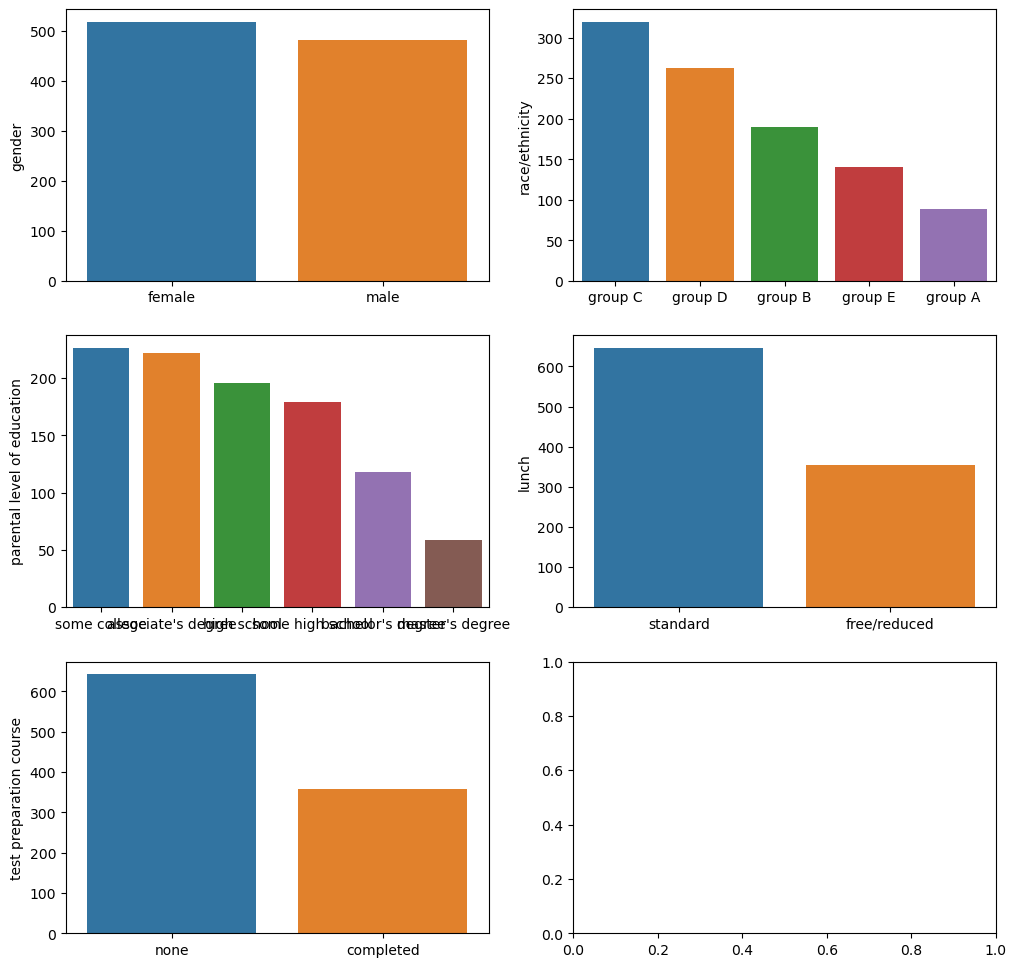

In [89]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for i, ax in enumerate(axs.flat):
    sns.barplot(x=data[cat_cols[i]].value_counts().index, y=data[cat_cols[i]].value_counts(), ax=ax)
    
    if i == len(cat_cols) - 1:
        break

Parental level of education bar chart has overlapped labels (the length of label text is long). Let's get a text description of it

In [90]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


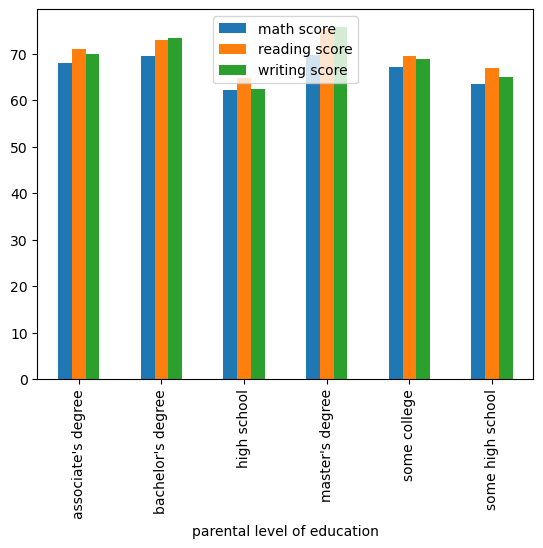

In [123]:
## the aggregation function used is the mean

ploe = pd.pivot_table(data, values=num_cols, index='parental level of education', aggfunc=np.mean)
ploe.plot(kind='bar')
display(ploe)
# sns.barplot(pd.pivot_table(data, values=num_cols, index='parental level of education'))

From the above pivot table, we can see that on mean scores, students whose parents attended `high school` and `some high school` *(these are the same thing?)* have low mean scores across all subjects relative to other levels of education. `bachelor's degree` and `master's degree` have high mean scores, so we can conclude that students whose parents have a relatively high level of education got high scores (on the average)

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


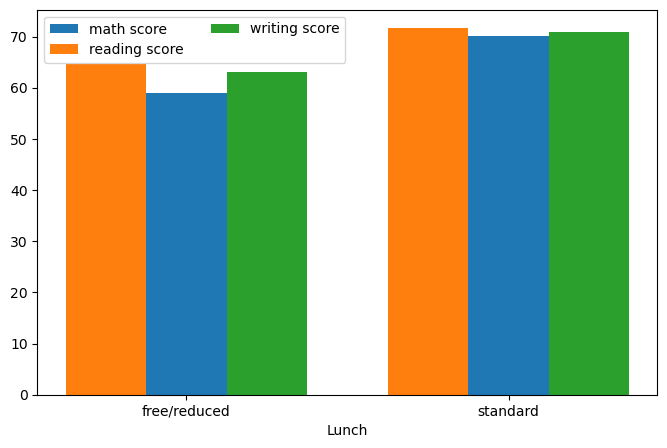

In [144]:
lunch = pd.pivot_table(data, values=num_cols, index='lunch', aggfunc=np.mean)

# to plot lunch composite bar graph
fig = plt.figure(figsize=(8, 5))

n = np.arange(len(lunch.index))
width = 0.25

plt.bar(n, lunch[lunch.columns[0]], width, label=lunch.columns[0])
plt.bar(n-width, lunch[lunch.columns[1]], width, label=lunch.columns[1])
plt.bar(n+width, lunch[lunch.columns[2]], width, label=lunch.columns[2])

plt.xticks(n, lunch.index)
plt.xlabel('Lunch')
plt.legend(ncol=2)

display(lunch)

From the above pivot table and bar graph, we can see that students with free/reduced lunch had lower mean scores than those with standard lunch.

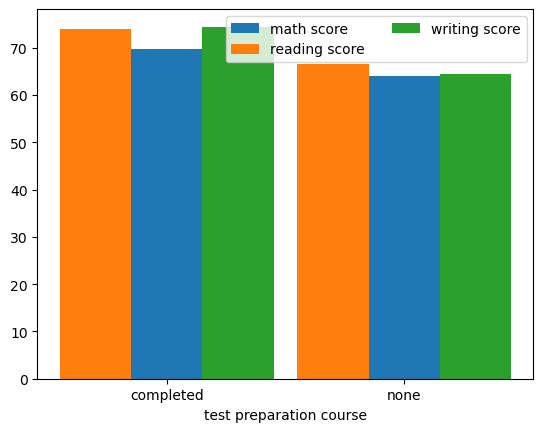

In [149]:
tpc = pd.pivot_table(data, values=num_cols, index='test preparation course', aggfunc=np.mean)

n = np.arange(len(tpc.index))
width=0.3

plt.bar(n, tpc[tpc.columns[0]], width, label=tpc.columns[0])
plt.bar(n-width, tpc[tpc.columns[1]], width, label=tpc.columns[1])
plt.bar(n+width, tpc[tpc.columns[2]], width, label=tpc.columns[2])

plt.xticks(n, tpc.index)
plt.xlabel('test preparation course')
plt.legend(ncol=2)

From the above cell, we can see that students who didn't take a test preparation course had lower scores on average than those who did.

**All these test were taken to validate the outliers. The lowest scoring students had parents whose level of eductaion was high school *(whether prefixed with some or not).* For those who didn't, they either had free/reduced lunch, or didn't take test preparation courses. *Thus, we have evidence to support the outliers and they will not be removed.***

# Correlation Analysis

In this section, we aim to understand how each **numerical** feature correlates with another. This can help us make driven decisions about our dataset and remove redundant values if it exists.

To tackle this, we would make use of a heatmap to show the correlation matrix

<AxesSubplot:>

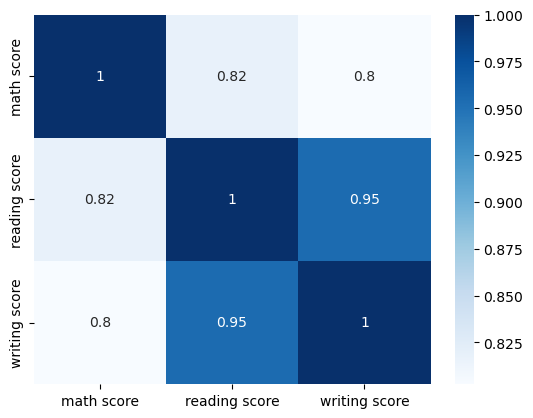

In [156]:
# heatmap of correlation matrix
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap=plt.cm.Blues)  

## you can view the correlation without the graph too
## just uncomment the line below
# display(data.corr(numeric_only=True))

From the above correlation analysis, we can see that `reading score` and `writing score` are highly correlated (~0.95). Essentially, whoever knows how to read knows how to write too. We can therefore advise to drop either the reading or writing test to avoid testing students on highly similar topics.

# Final data visualization

Since we've established that reading has a high correllation with writing, we will be testing a few scatterplots.

<AxesSubplot:xlabel='math score', ylabel='reading score'>

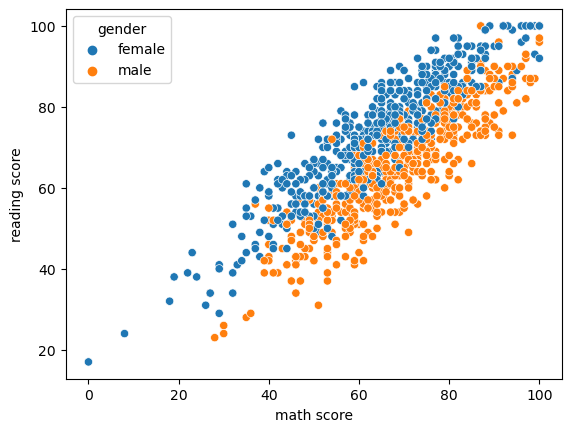

In [161]:
sns.scatterplot(data, x='math score', y='reading score', hue='gender')

From the above, we can see that the females performed better in reading than the males, while the males had better math score than the females. Checking for other scatterplots didn't yield conclusive information, so we will stop here.

# Conclusion

From all the analysis conducted, we conclude that:
<ul>
    <li>Extremely low scores was caused by students whose parents attended high school (in the majority) or attended college (no idea if they dropped out, minority) and/or students who were on free/reduced food. This metrics shows that such students are extremely poor (as their parents probably dropped out) or uncared for (thus needing free/reduced food)</li>
    <li>Another reason for low scores was unseriousness; some students didn't take the test preparation course. If this course is a paid course, the reason can be attributed to poverty once more.</li>
    <li>Female students performed better at reading/writing than male students. The reverse was the case for male students also.</li>
</ul>
    
Recommendations:
<ul>
    <li>The school should make an attempt to put all students on standard lunch</li>
    <li>The school should ensure all students take the test preparation course (if its free) or provide a financial aid for the students (if its paid)</li>
    <li>If the school cares about its results so much, it should conduct a comprehensive entrance exam to weed out poor performing students, and also conduct a background check on the parents of existing students.</li>
    <li>The female students should represent the school in debate competitions (anything that involves reading and writing basically) while male students should be involved in math competitions.</li>
</ul>
    
**THANK YOU**